# Regression with an Insurance Dataset EDA
## Season 4 Episode 12 of the Playground Series

As usual, we have not much information about the dataset we've been given for this playground series. We'll need to do an exploratory data analysis to uncover what we're dealing with here...

Work to do:
1. Import Libraries
2. Read in the Data
3. Characterize the Data
4. Nulls Analysis
5. Compare Distributions (train vs test)
6. Ordinal Encode the Categories
7. View Correlations
8. Next Steps

## Import Libraries

In [1]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os
from sklearn.preprocessing import OrdinalEncoder as OE


## Read in the Data

In [2]:
#read in the data
df = pd.read_csv('/kaggle/input/playground-series-s4e12/train.csv')
dt = pd.read_csv('/kaggle/input/playground-series-s4e12/test.csv')

#How big are these?
df.shape,dt.shape

((1200000, 21), (800000, 20))

## Characterize the Data

In [3]:
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [4]:
pd.options.display.float_format = '{:.0f}'.format
df.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1200000,1181295,1155051,1090328,1125924,835971,1199994,1062118,1199999,1200000
mean,600000,41,32745,2,26,1,10,593,5,1103
std,346410,14,32180,1,12,1,6,150,3,865
min,0,18,1,0,2,0,0,300,1,20
25%,300000,30,8001,1,16,0,5,468,3,514
50%,600000,41,23911,2,25,1,10,595,5,872
75%,899999,53,44634,3,35,2,15,721,7,1509
max,1199999,64,149997,4,59,9,19,849,9,4999


In [5]:
dt.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28,Female,2310,NaN,4,Bachelor's,Self-Employed,8,Rural,Basic,NaN,19,NaN,1,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31,Female,126031,Married,2,Master's,Self-Employed,13,Suburban,Premium,NaN,14,372,8,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47,Female,17092,Divorced,0,PhD,Unemployed,24,Urban,Comprehensive,NaN,16,819,9,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28,Female,30424,Divorced,3,PhD,Self-Employed,5,Suburban,Comprehensive,1,3,770,5,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24,Male,10863,Divorced,2,High School,Unemployed,12,Suburban,Premium,NaN,14,755,7,2021-11-26 15:21:39.259788,Average,No,Weekly,House


In [6]:
dt.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration
count,800000,787511,770140,726870,750551,557198,799997,708549,799998
mean,1600000,41,32804,2,26,1,10,593,5
std,230940,14,32201,1,12,1,6,150,3
min,1200000,18,2,0,2,0,0,300,1
25%,1400000,30,8048,1,16,0,5,468,3
50%,1600000,41,23981,2,25,1,10,595,5
75%,1799999,53,44660,3,35,2,15,721,7
max,1999999,64,149997,4,58,9,19,849,9


In [7]:
# make columns lists
dfc = df.columns.tolist()
dtc = dt.columns.tolist()
#dfc, dtc

#set target
TARGET = 'Premium Amount'


## Nulls Analysis

Let's compare our two dataframes. Do the columns with nulls match across dataframes? Do the number of nulls look similar? Let's find out...

In [8]:
nullset = pd.DataFrame({'train':df.isnull().sum(),'trainperc': range(df.shape[1]),'test':dt.isnull().sum(), 'testperc': list(range(df.shape[1]))})
nullset['trainperc'] = nullset['trainperc'].astype(float)
nullset['trainperc'] = (nullset['train'] / df.shape[0]) * 100
nullset['testperc'] = (nullset['test'] /  dt.shape[0]) * 100
nullset

,train,trainperc,test,testperc
Age,18705,2,12489,2
Annual Income,44949,4,29860,4
Credit Score,137882,11,91451,11
Customer Feedback,77824,6,52276,7
Education Level,0,0,0,0
Exercise Frequency,0,0,0,0
Gender,0,0,0,0
Health Score,74076,6,49449,6
Insurance Duration,1,0,2,0
Location,0,0,0,0


With that table, we can see that the percentages of nulls are identical across the train and test sets. The same columns have nulls across the train and test set too.

## Uniques Analysis

Do the number of unique values seem to be consistent across the train and test sets?

In [9]:
for i in dtc:
    print(f"{i}: Uniques {df[i].nunique()} , {dt[i].nunique()} ")


id: Uniques 1200000 , 800000 
Age: Uniques 47 , 47 
Gender: Uniques 2 , 2 
Annual Income: Uniques 88593 , 80716 
Marital Status: Uniques 3 , 3 
Number of Dependents: Uniques 5 , 5 
Education Level: Uniques 4 , 4 
Occupation: Uniques 3 , 3 
Health Score: Uniques 532657 , 388702 
Location: Uniques 3 , 3 
Policy Type: Uniques 3 , 3 
Previous Claims: Uniques 10 , 10 
Vehicle Age: Uniques 20 , 20 
Credit Score: Uniques 550 , 550 
Insurance Duration: Uniques 9 , 9 
Policy Start Date: Uniques 167381 , 158776 
Customer Feedback: Uniques 3 , 3 
Smoking Status: Uniques 2 , 2 
Exercise Frequency: Uniques 4 , 4 
Property Type: Uniques 3 , 3 


Yes, the Uniques align across the train and test set. Several of these columns will be easily one-hot encoded or numerically encoded to appease a littany of algorithms.

## Compare Distributions

The columnar data from the train and test set "Should" have similar distributions of data. We are looking to see if any of the distributions are significantly off. This would clue us in to a non-representative sampling that took place upstream somewhere...

Age Plots:


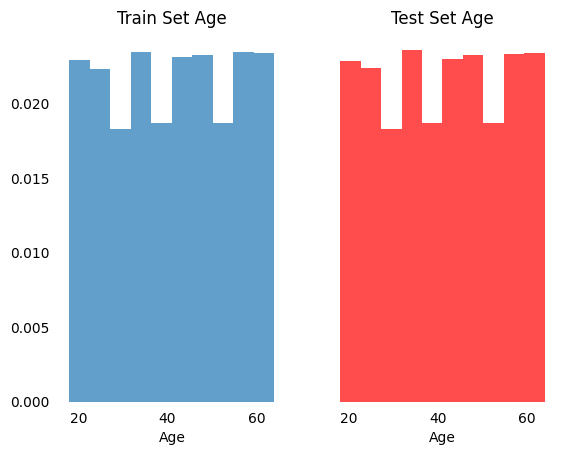


Annual Income Plots:


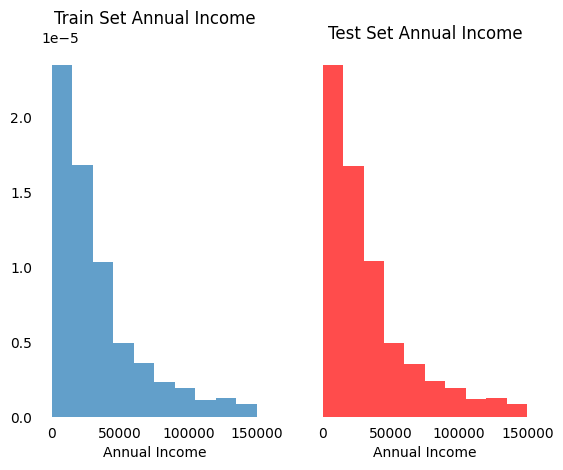


Number of Dependents Plots:


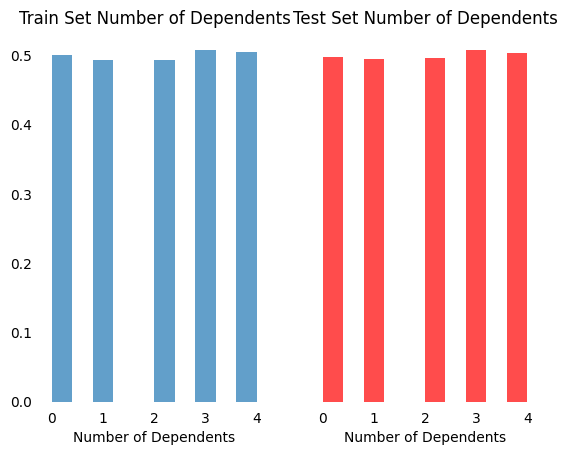


Health Score Plots:


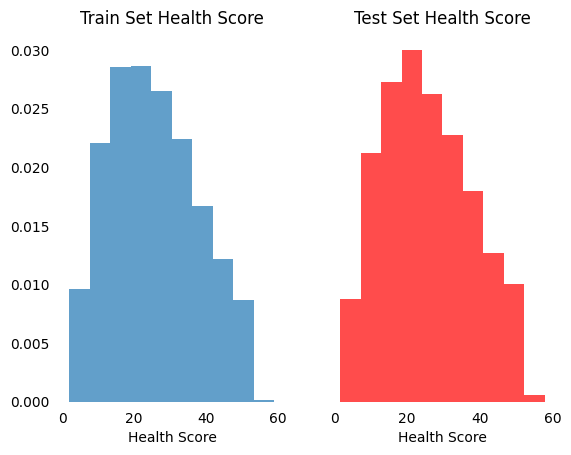


Previous Claims Plots:


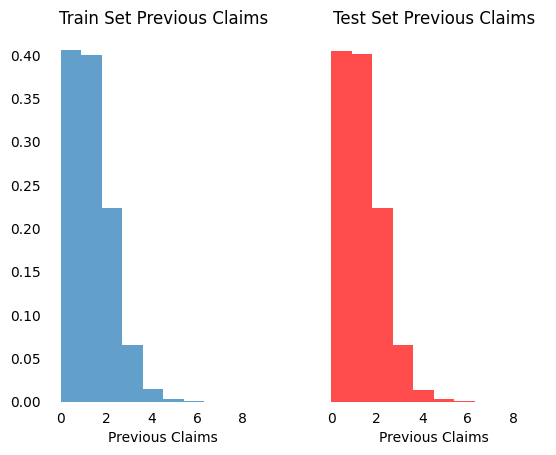


Vehicle Age Plots:


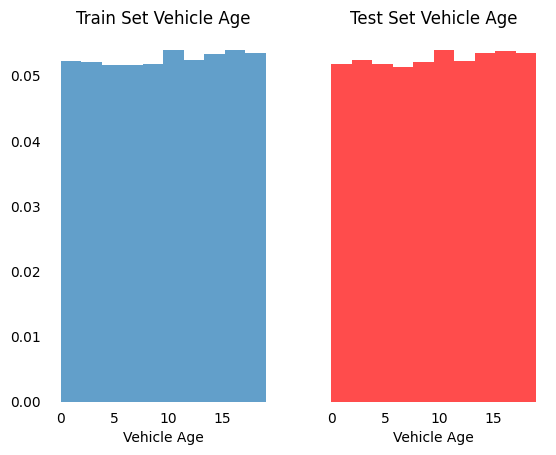


Credit Score Plots:


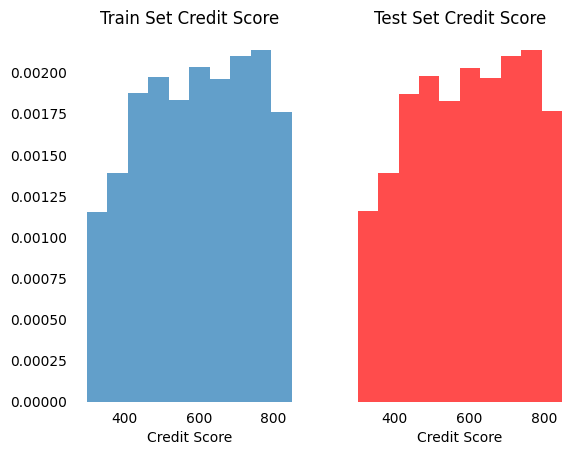


Insurance Duration Plots:


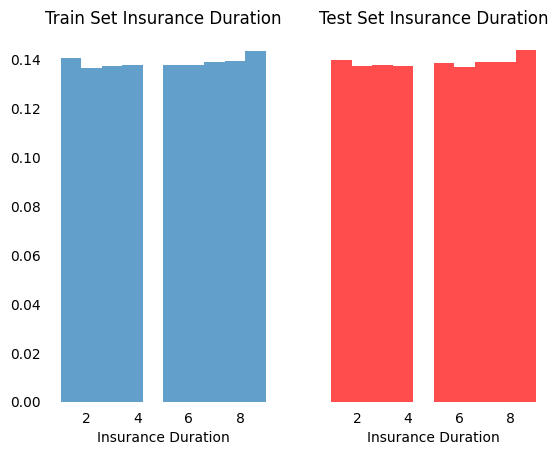

In [10]:
for i in dtc[1:]:
    if dt[i].dtype in [int,float]: 
        print(f'{i} Plots:')
        fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2, sharex=False, sharey=True)
        ax1.hist(df[i].astype(float).values, density=True, alpha=0.7)
     
        ax1.tick_params(left=False, bottom=False)
        ax1.set_xlabel(i)
        ax1.set_title(f"Train Set {i}")
        for ax, spine in ax1.spines.items():
            spine.set_visible(False)
        
        ax2.hist(dt[i].astype(float).values, density=True, color='red', alpha=0.7)
       
        ax2.tick_params(left=False, bottom=False)
        ax2.set_xlabel(i)
        ax2.set_title(f"Test Set {i}")
        for ax, spine in ax2.spines.items():
            spine.set_visible(False)
        
        plt.show()
        print('')

Great. The distributions look similar across each of the columns. Let's move on to the correlations.

## Correlation Plots

Since we are asked to run regressions on this data, we should take a look at the correlation matrices. Higher correlations (positive or negative) would translate to more significant variables in the ensuing models. Let's see how they look.

In [11]:
CAT_COLS , NUM_COLS = [],[]
for i in dtc:
    if dt[i].dtype in [int,float]:
        NUM_COLS.append(i)
    else:
        CAT_COLS.append(i)

In [12]:
oe = OE( handle_unknown = 'use_encoded_value', unknown_value= -1, encoded_missing_value= -2)
oe.fit(df[CAT_COLS])
df[CAT_COLS] = oe.transform(df[CAT_COLS])
dt[CAT_COLS] = oe.transform(dt[CAT_COLS])

<Axes: >

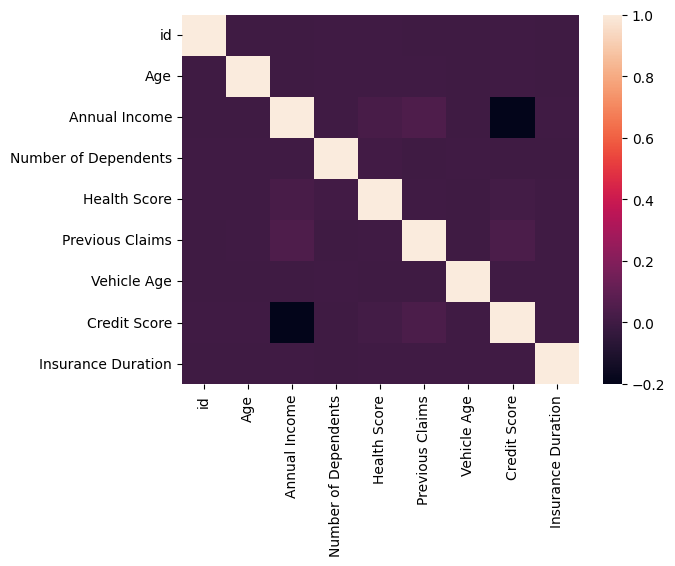

In [13]:
sns.heatmap(df[NUM_COLS].corr())

<Axes: >

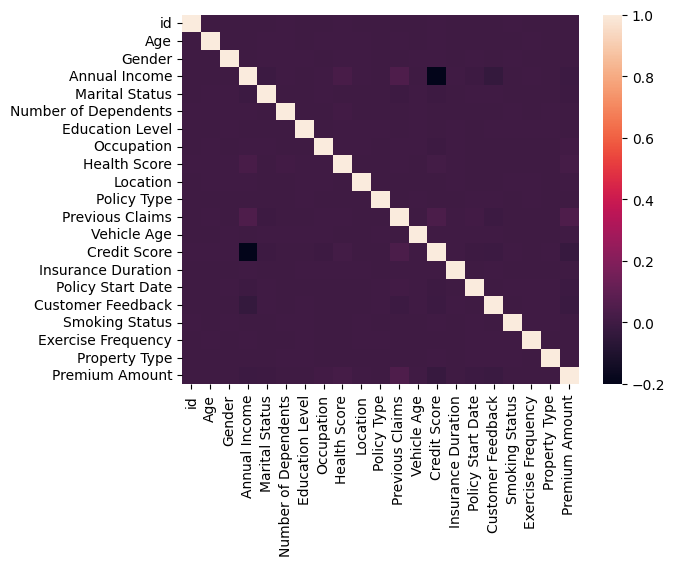

In [14]:
sns.heatmap(df.corr())

<Axes: >

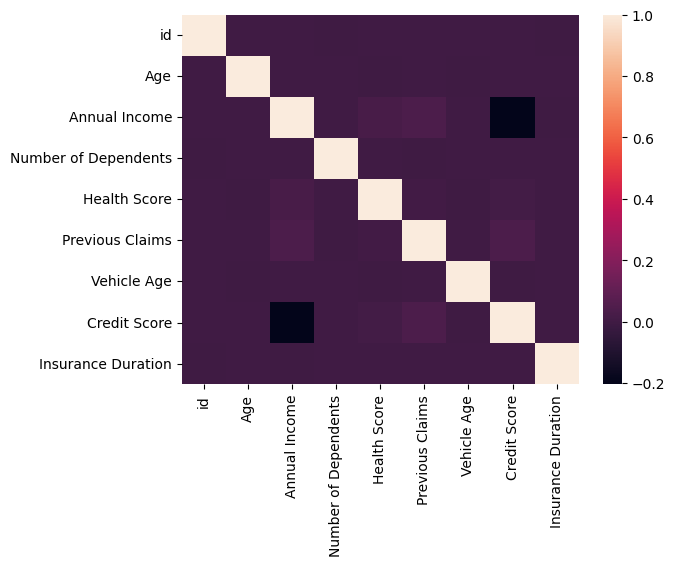

In [15]:
sns.heatmap(dt[NUM_COLS].corr())

<Axes: >

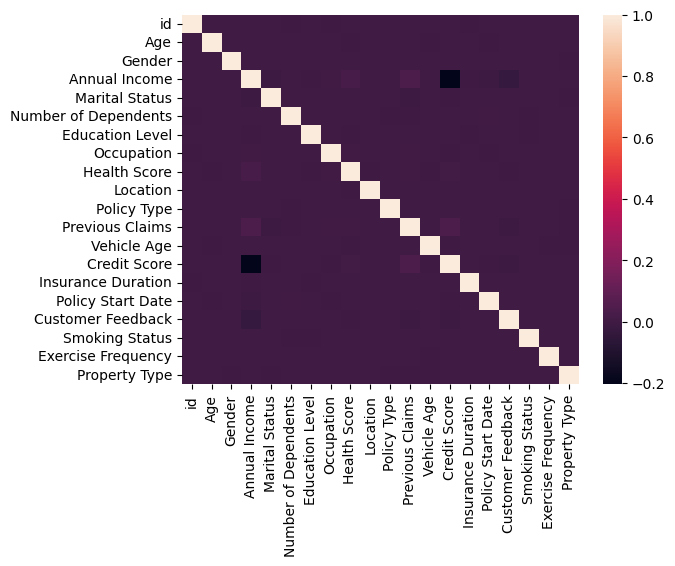

In [16]:
sns.heatmap(dt.corr())

WOAH! That is an interesting series of correlation plots. 
- The Bad: There seems to be very little signal in this data. There are no correlations greater than +/- .2. So we are going to need to run very sensitive models to pull the signal out and make accurate predictions.
- The Good: At least the train and test set have similar numbers. This is encouraging because the data was probably the result of a good random sampling.

## Next Steps:

So, what we found was both encouraging and challenging:
- Lots of data, 2M observations split 60% train, 40% test.
- The nulls in both train and test are consistent. If able to mitigate train set nulls, test set nulls should act similarly.
- The unique values in the categoricals look to match across train and test.
- Sampling looks good, distributions seem consistent across train and test.
- The correlation plot show very little signal in this data. We'll have to run very sensitive models to accurately predict values in the test set.

Thanks for taking a look.
If this was helpful, you know what to do.
